In [1]:
import numpy as np
import sys, os, re
import pandas as pd
import scipy.optimize

from deeplate.MMdata import MMData
import deeplate.postproc as post
import matplotlib.pyplot as plt


In [3]:
folder_list = ['/scicore/home/nimwegen/witzg/DeepPlateAnalysis/Analysis4_20180315_m9gluc_M02_1/dataframes/',
               '/scicore/home/nimwegen/witzg/DeepPlateAnalysis/Analysis4_20180506_synrich_M02_1/dataframes/']

In [3]:
for f in folder_list:
    
    datafolder = f
    
    if not os.path.exists(datafolder+'/fits'):
        os.makedirs(datafolder+'/fits')

    fluoframe = post.recover_dataframes(datafolder)
    fit_results = post.fit_dataset(fluoframe)
    post.plot_fits(fit_results,datafolder+'/fits')
    
    results_frame = pd.DataFrame(fit_results)
    results_frame.to_csv(datafolder+'/fits/fit_dataframe.csv')

In [1]:
import numpy as np
import sys, os, re
import pandas as pd
import matplotlib.pyplot as plt


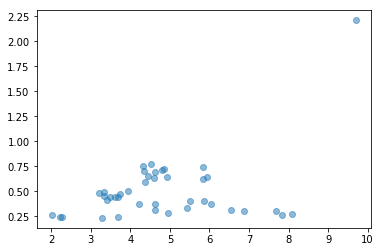

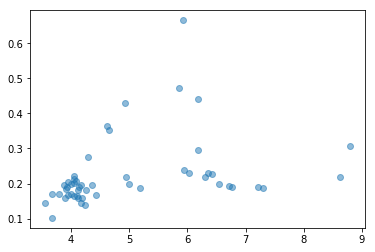

In [4]:
for f in folder_list:
    
    fits = pd.read_csv(f+'/fits/fit_dataframe.csv')
    plt.plot(fits[fits.amp1>20].mean1,np.abs(fits[fits.amp1>20].sigma1),'o',alpha = 0.5)
    plt.show()